In [1]:
import os
os.chdir('../../')

In [2]:
!ls /data/guided-diffusion/samples/64x64_diffusion/dpmsolver++_order3_20/image_samples/images/

0.npz	 113.npz  127.npz  25.npz  39.npz  52.npz  66.npz  7.npz   93.npz
100.npz  114.npz  12.npz   26.npz  3.npz   53.npz  67.npz  80.npz  94.npz
101.npz  115.npz  13.npz   27.npz  40.npz  54.npz  68.npz  81.npz  95.npz
102.npz  116.npz  14.npz   28.npz  41.npz  55.npz  69.npz  82.npz  96.npz
103.npz  117.npz  15.npz   29.npz  42.npz  56.npz  6.npz   83.npz  97.npz
104.npz  118.npz  16.npz   2.npz   43.npz  57.npz  70.npz  84.npz  98.npz
105.npz  119.npz  17.npz   30.npz  44.npz  58.npz  71.npz  85.npz  99.npz
106.npz  11.npz   18.npz   31.npz  45.npz  59.npz  72.npz  86.npz  9.npz
107.npz  120.npz  19.npz   32.npz  46.npz  5.npz   73.npz  87.npz
108.npz  121.npz  1.npz    33.npz  47.npz  60.npz  74.npz  88.npz
109.npz  122.npz  20.npz   34.npz  48.npz  61.npz  75.npz  89.npz
10.npz	 123.npz  21.npz   35.npz  49.npz  62.npz  76.npz  8.npz
110.npz  124.npz  22.npz   36.npz  4.npz   63.npz  77.npz  90.npz
111.npz  125.npz  23.npz   37.npz  50.npz  64.npz  78.npz  91.npz
112.npz  126.npz 

In [5]:
import numpy as np
import torch
import torch.nn.functional as F

save_file = '/data/guided-diffusion/samples/64x64_diffusion/dpmsolver++_order3_20/image_samples/images/0.npz'
data = np.load(save_file)
print(data['traj'].shape)


(21, 3, 64, 64)


In [6]:
import numpy as np
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


def show_traj_grid(traj, nrow=None, padding=0, figsize=None, save_path=None):
    # numpy → torch
    if isinstance(traj, np.ndarray):
        traj = torch.from_numpy(traj)
    else:
        traj = traj.clone()

    # [-1,1] → [0,1]
    if traj.min() < 0:
        traj = (traj + 1) / 2

    nrow = nrow or traj.shape[0]
    grid = make_grid(traj, nrow=nrow, padding=padding).permute(1, 2, 0).cpu().numpy()

    plt.figure(figsize=figsize or (2 * nrow, 2))
    plt.imshow(grid)
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight", pad_inches=0, dpi=300)
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6087525..2.5002735].


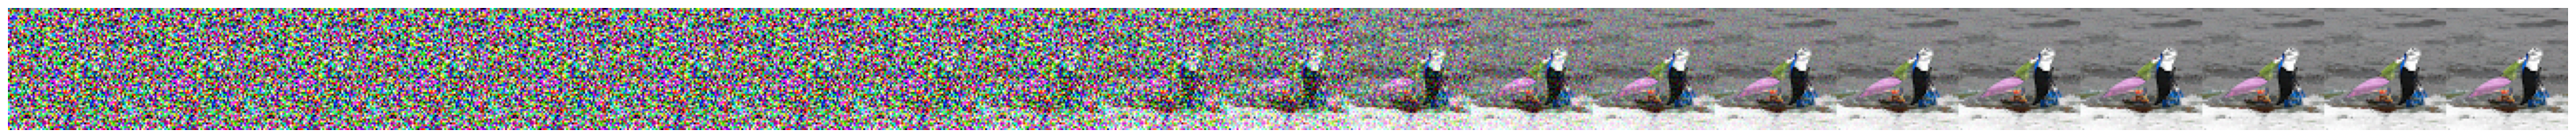

In [7]:
show_traj_grid(data['traj'])